### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import linregress
import json
import math
from collections import Counter
import numpy as np
from scipy.optimize import curve_fit
import statistics as stat
import matplotlib.colors as mcolors
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from scipy import stats

### PSI-BLAST 5 (E-value cutoff = e-10, %identity cutoff = 30%, query coverage cutoff = 1)

To test that phylogenetic distance positively correlates with expression distance within homologous groups, I ran Mantel tests using the following script:

    within_homologous_group_correlation.R

### Data Loading

In [2]:
data = pd.read_csv('/home/gabe/Desktop/mtstp/data/intermediate_data/gene_cluster_diversity_analysis/phylogenetic_vs_expression_distance.csv')
data

,Unnamed: 0,r,p
0,1,0.324433,0.001000
1,2,0.097667,0.010000
2,3,-0.113543,0.751000
3,4,0.565224,0.333333
4,5,0.357646,0.001000
...,...,...,...
117,118,-0.021434,0.425000
118,119,0.774573,0.125000
119,120,-0.543726,0.958333
120,121,0.163143,0.198611


In [6]:
#count number of positive associations
correlation_coefficients = list(data['r'])
positive = 0
for coefficient in correlation_coefficients:
    if coefficient > 0:
        positive += 1
print(f"Positive correlation % = {positive / len(correlation_coefficients)}")
print(f"Negative or null correlation % = {(len(correlation_coefficients) - positive) / len(correlation_coefficients)}")

Positive correlation % = 0.7213114754098361
Negative or null correlation % = 0.2786885245901639


### Make plots

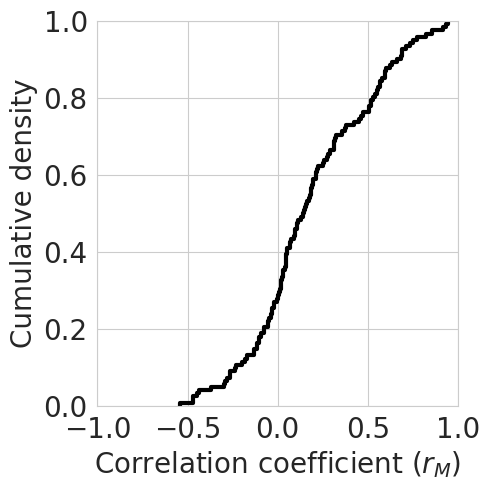

In [16]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

#plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#A
sns.ecdfplot(data=data, x="r", ax=ax1, linewidth=3, color='black')
ax1.set_xlabel(r'Correlation coefficient ($r_M$)', fontsize = 20)
ax1.set_ylabel('Cumulative density', fontsize = 20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim(-1,1)
plt.tight_layout()

plt.savefig('/home/gabe/Desktop/mtstp/figures/primary/distance_correlations_ecdf.pdf')